# Math 725 Advanced Linear Algebra
## Space filling Curves


### Brent A. Thorne

brentathorne@gmail.com

##### Coordinate functional space explorations

#### Resources:



Brain Hayes, American Scientist: https://www.americanscientist.org/article/crinkly-curves 

https://en.wikipedia.org/wiki/Transformation_matrix

https://www.brainvoyager.com/bv/doc/UsersGuide/CoordsAndTransforms/SpatialTransformationMatrices.html

https://en.wikipedia.org/wiki/Hilbert_curve

https://en.wikipedia.org/wiki/Gosper_curve

In [2]:
# import libraries
import numpy as np
import sympy as sym
from sympy.matrices import Matrix
from sympy import I
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from sympy import init_printing
init_printing()

from matplotlib import rcParams

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

In [3]:
def m_plot(P):
    p=np.array(P.tolist()).astype(np.float64)
    x=p[0]
    y=p[1]
    plt.plot(x,y)
    plt.scatter(x,y)
    plt.scatter(x[0],y[0],c='pink')
    plt.grid(visible=True);
    plt.gca().set_aspect("equal") # square grids are pretty
    plt.axhline(0, color='black', alpha = .2, linestyle='--')
    plt.axvline(0, color='black', alpha = .2, linestyle='--')

In [4]:
def z_plot(Z, c=None, labels=True):
    #display(Latex(f'${sym.latex(Z.T)}$'))
    z= np.array(Z.tolist()).astype(np.complex64)
    n = len(z)
    
    if labels==True:
        plt.scatter(z.real, z.imag, c=c)
        for i in range(len(z)): # this got a bit fancy
            zz = z[i] + .06 *np.exp(1j*2*np.pi*i/n)  #offset text
            plt.text(zz.real, zz.imag, i, fontsize=12)
#    z = np.append(z,z[0]) # close the shape
    plt.plot(z.real, z.imag, c=c)
    plt.grid(visible=True);
    plt.gca().set_aspect("equal") # square grids are pretty
    plt.axhline(0, color='black', alpha = .2, linestyle='--')
    plt.axvline(0, color='black', alpha = .2, linestyle='--')

## Hilbert Curve
Open with a semimanual process then generalize

## Affine Hilbert

⎡-1/2  -1/2  1/2  1/2 ⎤
⎢                     ⎥
⎢-1/2  1/2   1/2  -1/2⎥
⎢                     ⎥
⎢ 0     0     0    0  ⎥
⎢                     ⎥
⎣ 1     1     1    1  ⎦

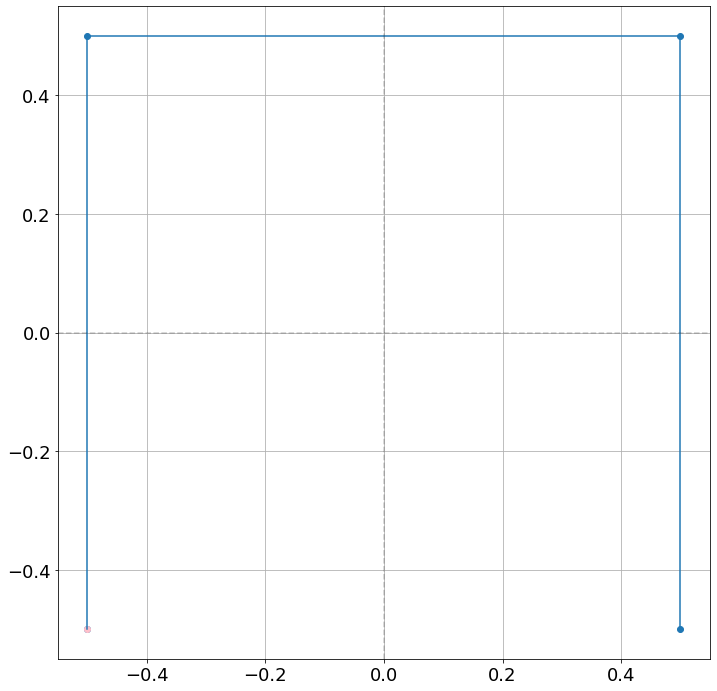

In [4]:
# let's begin again this time with a 3D affine transformation so we don't have to do this thrice 
T = Matrix([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1]
])

# Now our 2D shape, we'll save that 3rd dim for later
P = sym.Rational(1,2)*Matrix([[-1,-1],[-1,1],[1,1],[1,-1]]).T #make normal unit square
P = P.col_join(sym.zeros(1,P.shape[1]))
P = P.col_join(sym.ones(1,P.shape[1]))
m_plot(T*P)
T*P

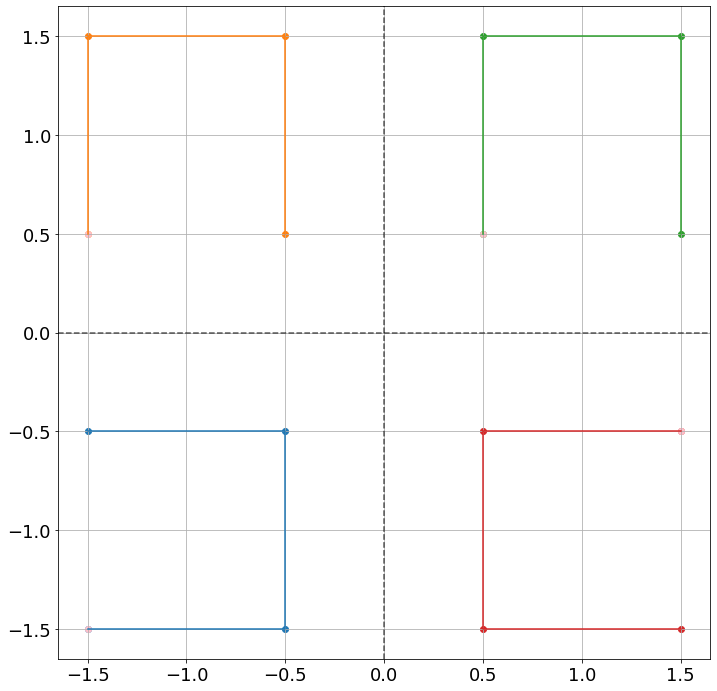

In [5]:
R = Matrix([
    [0,1,0,0],
    [1,0,0,0],
    [0,0,1,0],
    [0,0,0,1]
]) # actaully this is a reflect and rotate


S_1 = Matrix([
    [1,0,0,-1],
    [0,1,0,-1],
    [0,0,1,0],
    [0,0,0,1]
])
m_plot(S_1*R*P) #reflect/rotate and shift left and down

S_2 = Matrix([
    [1,0,0,-1],
    [0,1,0,1],
    [0,0,1,0],
    [0,0,0,1]
])

m_plot(S_2*P) # shift left and up

S_3 = Matrix([
    [1,0,0,1],
    [0,1,0,1],
    [0,0,1,0],
    [0,0,0,1]
])

m_plot(S_3*P) # shift right and up

S_4 = Matrix([
    [1,0,0,1],
    [0,1,0,-1],
    [0,0,1,0],
    [0,0,0,1]
])

R_0 = Matrix([
    [0,-1,0,0],
    [-1,0,0,0],
    [0,0,1,0],
    [0,0,0,1]
]) # infinite monkeys

m_plot(S_4*R_0*P)

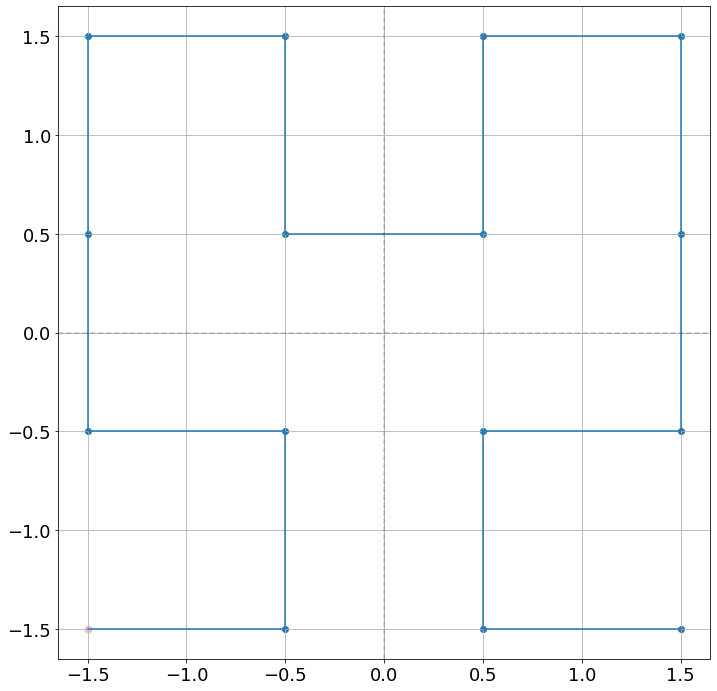

In [7]:
# my monkey
s=sym.Rational(1,2)
x = P

X = S_1*R*x
X = X.row_join(S_2*x)
X = X.row_join(S_3*x)
X = X.row_join(S_4*R_0*x)

m_plot(X)

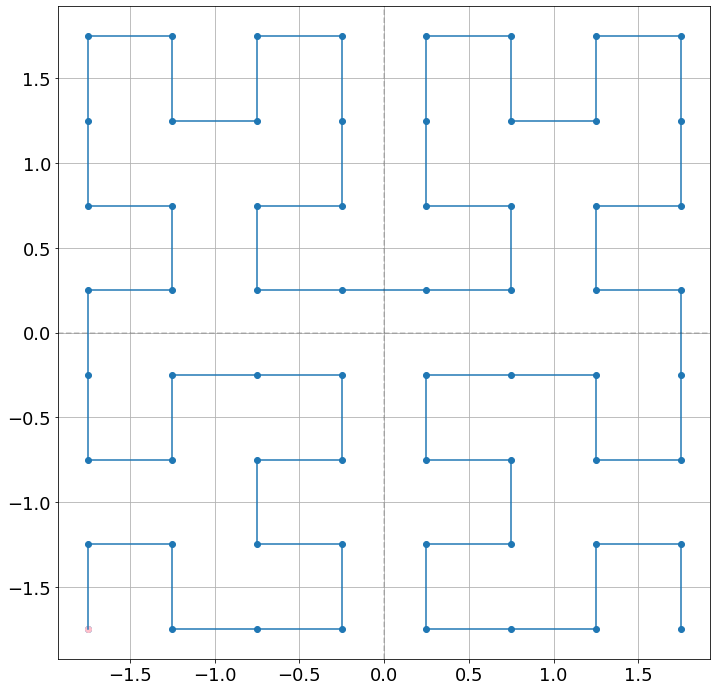

In [8]:
# release the monkeys
N = s*Matrix([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1/s]
]) # normalize back to unit square 
P1=N*X

x = P1
X = S_1*R*x
X = X.row_join(S_2*x)
X = X.row_join(S_3*x)
X = X.row_join(S_4*R_0*x)

m_plot(X)
X.shape

## Gosper Curve

In [9]:
##  Build our basis
# 360/60, 2*sym.pi/6, 2*sym.pi- 2*sym.pi/6

# translate
# rotate -2π/3 and translate
# rotate -5π/3 and translate
# rotate -π/3 and translate
# translate
# rotate 2π/3 and translate

z = 2*sym.pi*sym.I/6
p0 = 0
p1 = p0+sym.exp(sym.pi*sym.I/2)
p2 = p1+sym.exp(z/2)
p3 = p2+sym.exp(-sym.pi*sym.I/2)
p4 = p3+sym.exp(-z/2)
p5 = p4+sym.exp(sym.pi*sym.I/2)
p6 = p5+sym.exp(sym.pi*sym.I/2)
p7 = p6+sym.exp(5*z/2)
# now fix up the Hilbert curve for complex affine transforms

In [10]:
p = [p0, p1, p2, p3, p4, p5, p6, p7]
p

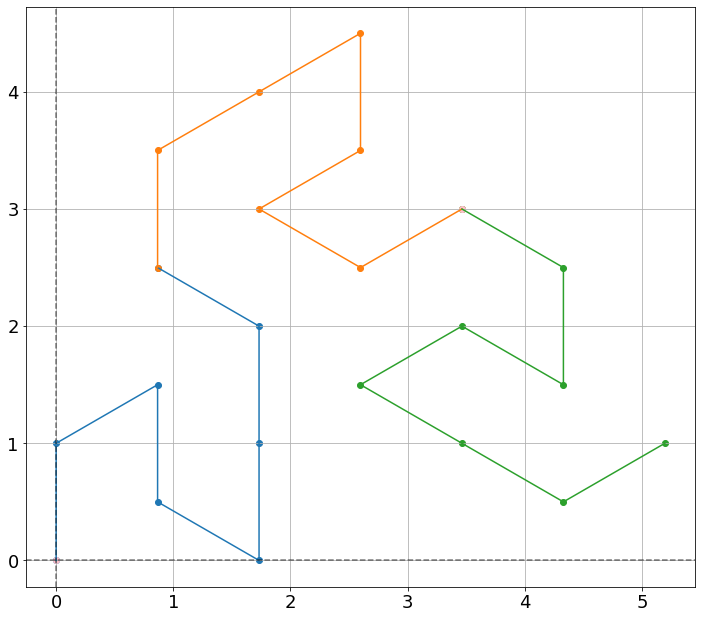

In [11]:
G0=Matrix([[sym.re(pp), sym.im(pp)]for pp in p]).T  # map to R^2
G0 = G0.col_join(sym.zeros(1,G0.shape[1])) # Pad to R^3
G0 = G0.col_join(sym.ones(1,G0.shape[1])) # Make similar in R^4 (R^3 X R^1) 

ROT = lambda theta: Matrix([
    [sym.cos(theta),-sym.sin(theta),0,0],
    [sym.sin(theta), sym.cos(theta),0,0],
    [0,0,1,0],
    [0,0,0,1]
])

TOT = lambda G: Matrix([  
    [1,0,0,G.col(-1)[0]],
    [0,1,0,G.col(-1)[1]],
    [0,0,1,0],
    [0,0,0,1]
])  # translates by last point in matrix/seq

OTO = lambda G: Matrix([  
    [1,0,0,G.col(0)[0]],
    [0,1,0,G.col(0)[1]],
    [0,0,1,0],
    [0,0,0,1]
])  # translates by first point in matrix/seq

m_plot(G0)
#m_plot(T_0*G0)
G1=TOT(G0)*ROT(2*2*sym.pi/6)*TOT(-G0)*G0
m_plot(G1) 
G2=OTO(G1)*ROT(-2*2*sym.pi/6)*G0
m_plot(G2)
# ... repeat n=8 times as we did in the basis generator

In [12]:
G0, G0.col(-1)[:2]

⎛⎡      √3   √3               √3 ⎤           ⎞
⎜⎢0  0  ──   ──   √3  √3  √3  ── ⎥           ⎟
⎜⎢      2    2                2  ⎥           ⎟
⎜⎢                               ⎥  ⎡√3     ⎤⎟
⎜⎢0  1  3/2  1/2  0   1   2   5/2⎥, ⎢──, 5/2⎥⎟
⎜⎢                               ⎥  ⎣2      ⎦⎟
⎜⎢0  0   0    0   0   0   0    0 ⎥           ⎟
⎜⎢                               ⎥           ⎟
⎝⎣1  1   1    1   1   1   1    1 ⎦           ⎠

##### Things to consider:
 * Permutation of basis for next interation
 * Geneneralized generator for all possible space filling curves

## $\mathbb{C}$affine
$\mathcal{T}$ea and $\mathbb{C}$offee

Does this even make since for non-real valued transfromation? ... I think not, however for $\mathbb{C}^1$ this is super simple as we'll demonstrate below.

##### Things to consider:
 * Modify for $\Bbb{C}$
 * What would a $\Bbb{C}\times\Bbb{R}^1\mapsto\Bbb{R}^2\times\Bbb{R}^1$ affine transform look like? The dim seems to check out.

## Complex Hilbert
The point was to use matrix transformation to generate our curves but now our transformations are additions and scalar multiplications of eigenvalues. 

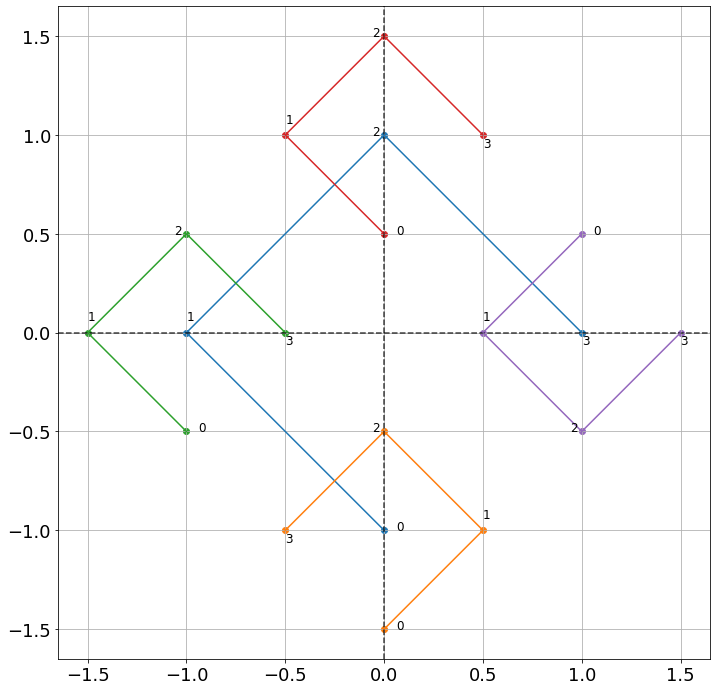

In [13]:
n = 4
ei = sym.ones(4,1)
z = sym.exp(-2*sym.pi*sym.I/n)
h = Matrix([z**(i+1) for i in range(4)])
z_plot(h)

z_plot(1/2 * z**2 * h.conjugate() - sym.I*ei)
z_plot(1/2 * h - ei) 
z_plot(1/2 * h + sym.I*ei)
z_plot(1/2 * h.conjugate() + ei)

# now we can see a way forward
# a rather simple transform of the coordinates
# using Antihermitian but we'll leave that as an exercise for later 

 ### Sort out the transforms

<IPython.core.display.Latex object>

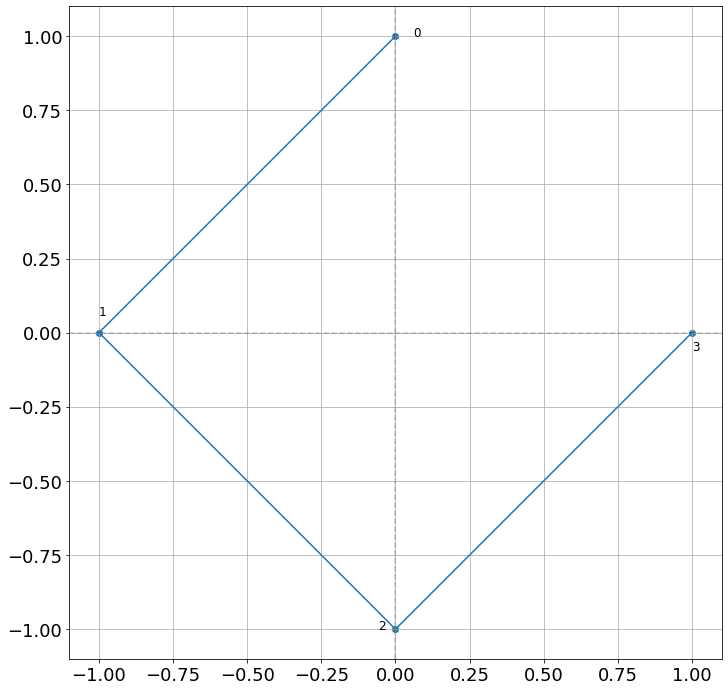

<IPython.core.display.Latex object>

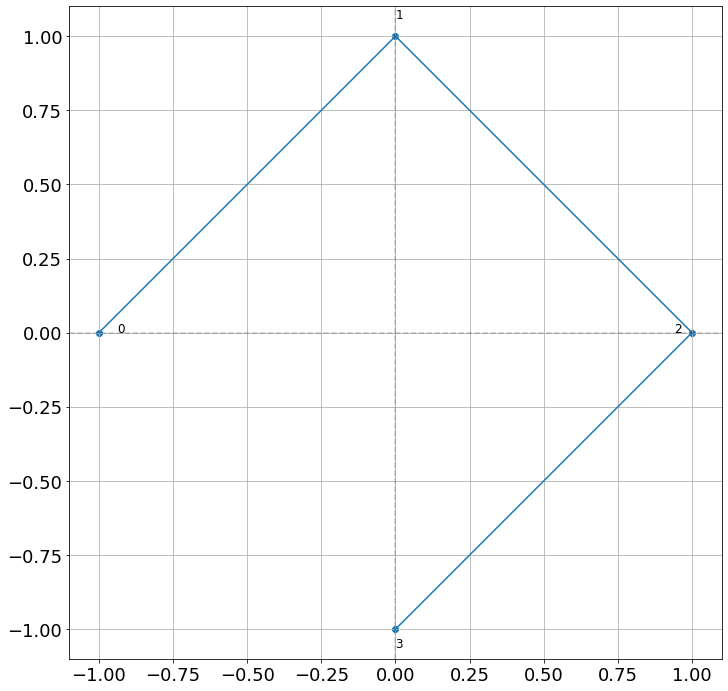

<IPython.core.display.Latex object>

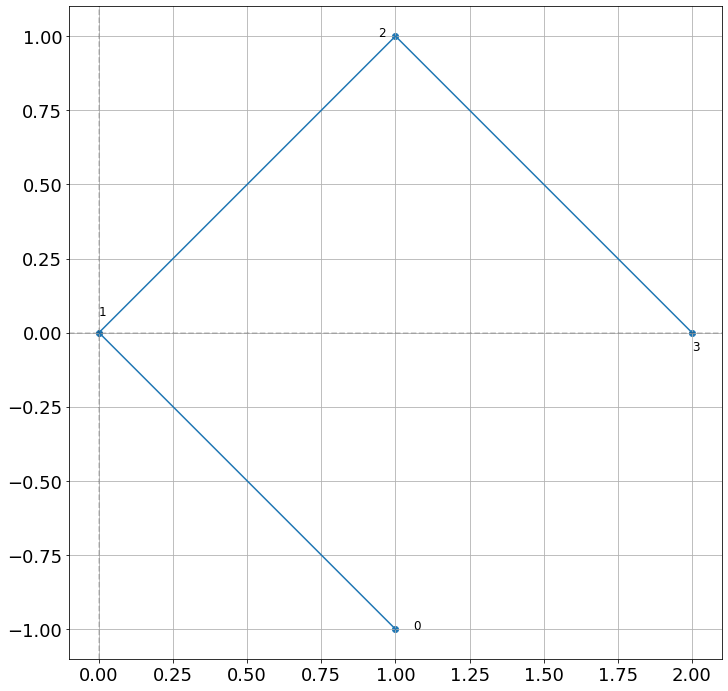

<IPython.core.display.Latex object>

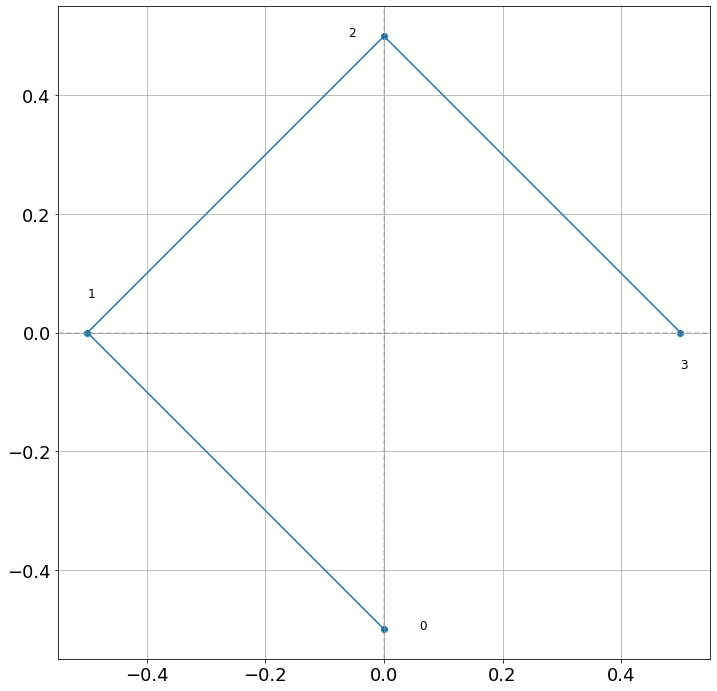

In [15]:
# mirror x
display(Latex('Mirror:'))
z_plot(h.conjugate())
plt.show()

# rot
display(Latex('Rotate:'))
z_plot(h*z)
plt.show()

# shift
display(Latex('Shift:'))
z_plot(h+sym.ones(4,1))
plt.show()

# scale
display(Latex('Scale:'))
z_plot(.5*h)
plt.show()

### Eigenvalues and Eigenvectors of a Real Matrix Action on $\Bbb{C}^n$
Consider $A\in \Bbb{R}^n \times\Bbb{R}^n$. Then $\overline{Ax}=\bar{A}\bar{x}=A\bar{x}$.  If $\lambda$ is an eigenvalue of $A$ and $x$ is a corresponding eigenvector in $\Bbb{C}^2$, then $$A\bar{x}=\overline{Ax}=\overline{\lambda x}=\bar{\lambda}\bar{x}$$
Hence $\bar{\lambda}$ is also an eigenvalue of $A$, with $\bar{x}$ a corresponding eigenvector.

Now we can see that when $A$ is real, its complex eigenvaules ($\lambda=a+bi, b\neq0$) occur in conjugate pairs.

See also Section 5.5 Complex Eigenvalues, Lay. 

### Affine combinations
Consider $v_1,...,v_n\in \Bbb{R^m}$ and $c_1,...,c_n\in\Bbb{R}$ then the affine combination is $$c_1v_1+...+c_nv_n$$ such that $c_1+...+c_n=1$.

Now we can create a set of all affine combinations of points to construct an affine hull (or affine span).

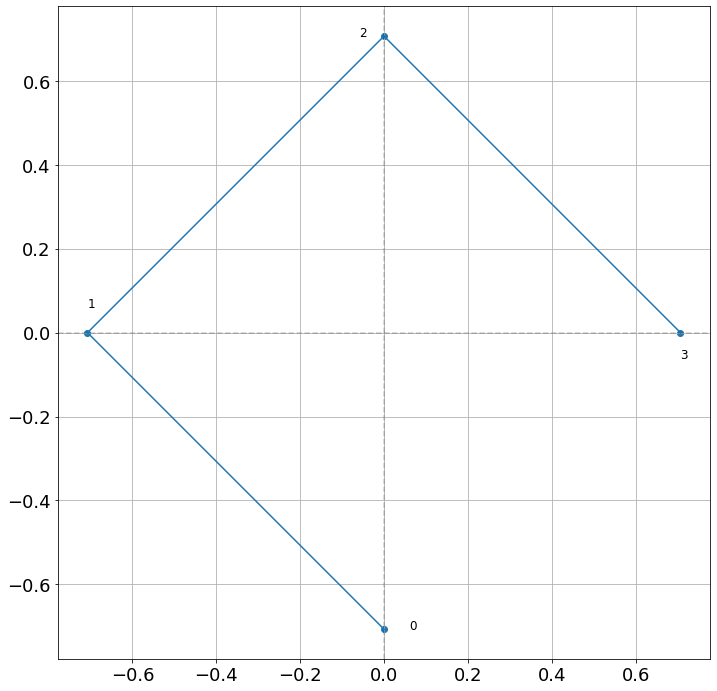

In [6]:
n = 4
z = sym.exp(-2*sym.pi*sym.I/n)
h0 = sym.sqrt(2)*Matrix([z**(i+1) for i in range(4)]) # normalize

h=sym.Rational(1,2) *h0
z_plot(h)
h.shape, h[0]

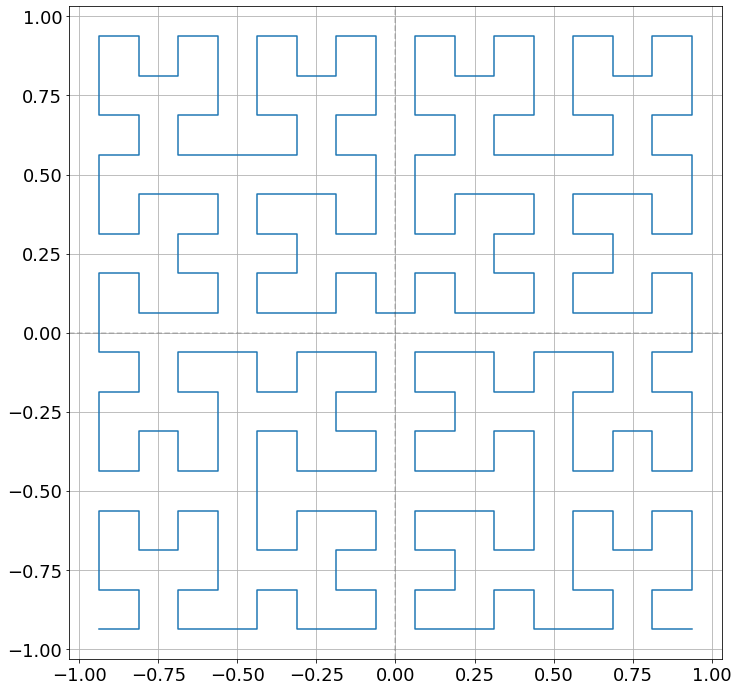

In [9]:
ei = sym.ones(h.shape[0],1)
H = Matrix([z**2 * h.conjugate() + h0[0]*ei,
            h + h0[1]*ei,
            h + h0[2]*ei,
            h.conjugate() + h0[3]*ei])

h=sym.Rational(1,2) *H
z_plot(sym.exp(-sym.pi*sym.I/4)*h, labels=False)
h.shape, h[-4],h[-3],h[-2],h[-1]

## Surface Projection

https://en.wikipedia.org/wiki/Planisphaerium

Ptolemy’s Planisphere: http://individual.utoronto.ca/acephalous/Sidoli_Berggren_2007.pdf

https://en.wikipedia.org/wiki/Riemann_sphere

https://www.maths.tcd.ie/~dwilkins/Courses/MA232A/MA232A_Mich2017/StWrapper.pdf

https://math.libretexts.org/Bookshelves/Abstract_and_Geometric_Algebra/Introduction_to_Groups_and_Geometries_(Lyons)/01%3A_Preliminaries/1.03%3A_Stereographic_projection

In [21]:
S_inv = lambda z: Matrix([  
    2*sym.re(z)/ (sym.Abs(z)**1 +1), 
    2*sym.im(z)/ (sym.Abs(z)**1 +1), 
    (sym.Abs(z)**2 -1)/(sym.Abs(z)**2 +1)])
#S=h.applyfunc(S_inv)

In [11]:
xline = []
yline = []
zline = []

for i in range(h.shape[0]):
    z = h[i]
    xline.append(2*sym.re(z)/ (sym.Abs(z)**1 +1))
    yline.append(2*sym.im(z)/ (sym.Abs(z)**1 +1))
    zline.append((sym.Abs(z)**2 -1)/(sym.Abs(z)**2 +1))

In [12]:
x=np.array(xline).astype(np.float64)
y=np.array(yline).astype(np.float64)
z=np.array(zline).astype(np.float64)

In [13]:
X = np.array([x,y,z])
X.shape
np.save('hilbert.npy', X)

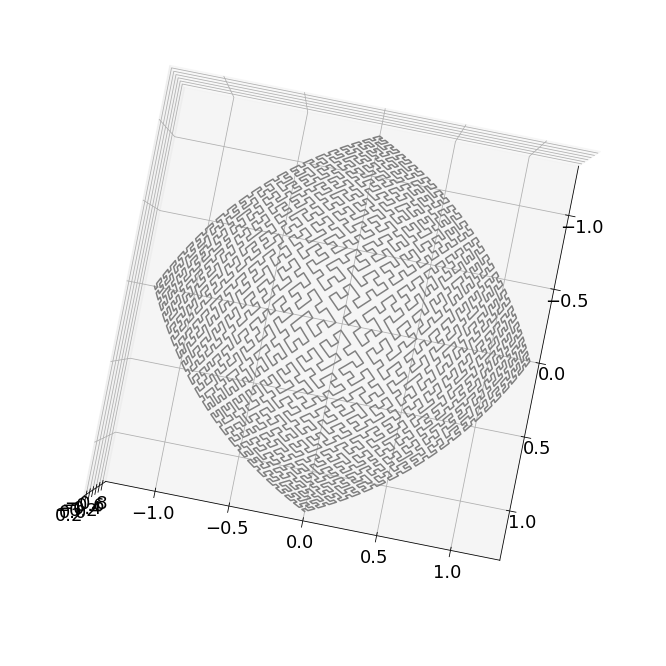

In [31]:
#%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x,y,z, 'gray')
ax.view_init(elev=90., azim=10.)

In [2]:
import plotly.express as px
import pandas as pd

fig = px.line_3d(x=x,y=y,z=z)
fig.show()

NameError: name 'x' is not defined

## Dynamics

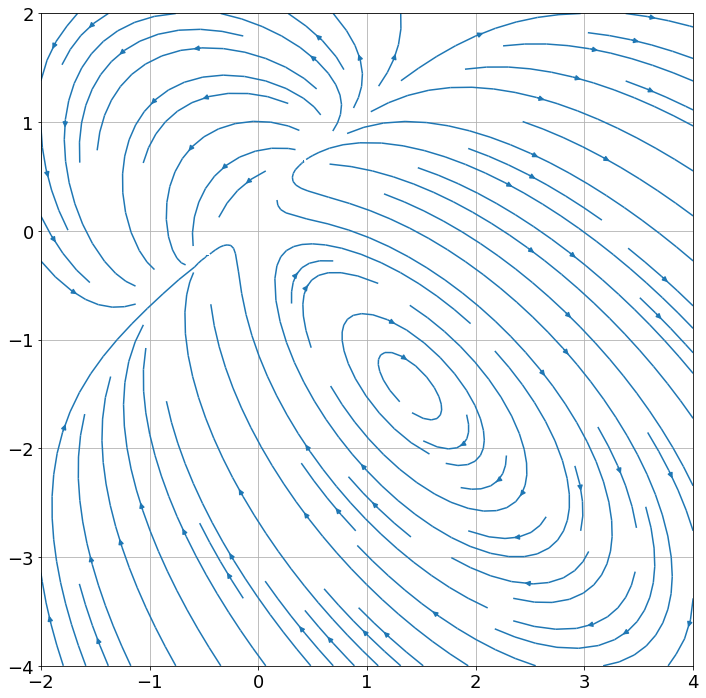

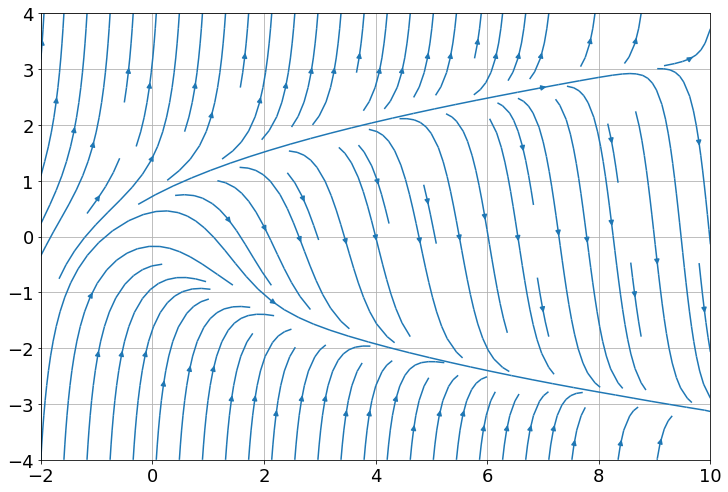

In [19]:
def plot_dynamics(vector_field, x_left, x_right, x_res, y_down, y_up, y_res):
    x, y = np.meshgrid(np.linspace(x_left, x_right, x_res), np.linspace(y_down, y_up, y_res))
    Vx, Vy = vector_field(x, y)
    if type(Vx) != object:
        Vx = Vx * np.ones(x.shape, dtype=float)
    if type(Vy) != object:
        Vy = Vy * np.ones(x.shape, dtype=float)
    fig, ax = plt.subplots()
    plt.grid()
    #ax.set_aspect( 1 )
    ax.streamplot(x, y, Vx, Vy)
    ax.set_aspect('equal')    
    plt.show()
    return None

# type the formulas for the x and y components of the vector fields 
# (use np.cos and np.sin etc if not polynomial vector fields):
def V(x, y):    
    return  ( 2*x - y + 3*(x**2-y**2) + 2*x*y,   x - 3*y - 3*(x**2-y**2) + 3*x*y )

def f(x, y):    
    return  ( 1,  y**2 - x ) 

    
plot_dynamics(V, -2, 4, 100, -4, 2, 100)
plot_dynamics(f, -2, 10, 100, -4, 4, 100)

In [20]:
A = Matrix([[-1,2],[-2,-1]])
A.eigenvects()

⎡⎛             ⎡⎡ⅈ⎤⎤⎞  ⎛             ⎡⎡-ⅈ⎤⎤⎞⎤
⎢⎜-1 - 2⋅ⅈ, 1, ⎢⎢ ⎥⎥⎟, ⎜-1 + 2⋅ⅈ, 1, ⎢⎢  ⎥⎥⎟⎥
⎣⎝             ⎣⎣1⎦⎦⎠  ⎝             ⎣⎣1 ⎦⎦⎠⎦